In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!unzip '/content/drive/My Drive/Dataset/hand-gesture.zip' -d '/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /dataset/07/06_index/frame_07_06_0027.png  
  inflating: /dataset/07/06_index/frame_07_06_0028.png  
  inflating: /dataset/07/06_index/frame_07_06_0029.png  
  inflating: /dataset/07/06_index/frame_07_06_0030.png  
  inflating: /dataset/07/06_index/frame_07_06_0031.png  
  inflating: /dataset/07/06_index/frame_07_06_0032.png  
  inflating: /dataset/07/06_index/frame_07_06_0033.png  
  inflating: /dataset/07/06_index/frame_07_06_0034.png  
  inflating: /dataset/07/06_index/frame_07_06_0035.png  
  inflating: /dataset/07/06_index/frame_07_06_0036.png  
  inflating: /dataset/07/06_index/frame_07_06_0037.png  
  inflating: /dataset/07/06_index/frame_07_06_0038.png  
  inflating: /dataset/07/06_index/frame_07_06_0039.png  
  inflating: /dataset/07/06_index/frame_07_06_0040.png  
  inflating: /dataset/07/06_index/frame_07_06_0041.png  
  inflating: /dataset/07/06_index/frame_07_06_0042.png  
  inflating: /dataset/07/06_index/fra

In [3]:
import sys
import os
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt


from tensorflow.keras.utils import img_to_array, load_img
DATA_DIR = '/dataset'

In [15]:
def preprocessing():
  datagen = ImageDataGenerator(
      rescale=1./255,
      # rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      # shear_range=0.2,
      # zoom_range=0.2,
      horizontal_flip=True,
      # fill_mode='nearest',
      validation_split=0.2
  )

  train_generator = datagen.flow_from_directory(
      DATA_DIR,
      target_size=(224, 224),
      batch_size=64,
      class_mode='categorical',
      subset='training'
  )

  validation_generator = datagen.flow_from_directory(
      DATA_DIR,
      target_size=(224, 224),
      batch_size=64,
      class_mode='categorical',
      subset='validation'
  )

  return train_generator, validation_generator

In [16]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs is None:
      logs = {}
    if logs.get('val_accuracy') >= 0.95:
      print(f'Epoch {epoch}: Reached accuracy threshold')
      self.model.stop_training = True

In [39]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2,2),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2,2),
        # tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(4096, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(2048, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(1024, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [40]:
def train():
  train_generator, validation_generator = preprocessing()

  callback = mycallback()

  model = create_model()

  history = model.fit(train_generator,
                      epochs=10,
                      batch_size=64,
                      verbose=1,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2), callback],
                      validation_data=validation_generator)

  return model, history

In [41]:
model, history = train()

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Epoch 1/10
250/250 [==============================] - 326s 1s/step - loss: 1.6421 - accuracy: 0.3913 - val_loss: 1.0496 - val_accuracy: 0.5872
Epoch 2/10
250/250 [==============================] - 291s 1s/step - loss: 0.7698 - accuracy: 0.7056 - val_loss: 0.6112 - val_accuracy: 0.7717
Epoch 3/10
250/250 [==============================] - 290s 1s/step - loss: 0.5150 - accuracy: 0.8013 - val_loss: 0.5471 - val_accuracy: 0.7825
Epoch 4/10
250/250 [==============================] - 298s 1s/step - loss: 0.3873 - accuracy: 0.8484 - val_loss: 0.4182 - val_accuracy: 0.8315
Epoch 5/10
250/250 [==============================] - 292s 1s/step - loss: 0.3101 - accuracy: 0.8821 - val_loss: 0.3704 - val_accuracy: 0.8650
Epoch 6/10
250/250 [==============================] - 296s 1s/step - loss: 0.2360 - accuracy: 0.9066 - val_loss: 0.2842 - val_accuracy: 0.8942
Epoch 7/10
250/250 [==============================] - 2

In [42]:
def visualization(accuracy, val_accuracy, loss, val_loss):
    epochs = range(len(accuracy))

    fig, axes = plt.subplots(2, 1, figsize=(6, 6))

    axes[0].plot(epochs, accuracy, 'r', label='Training accuracy')
    axes[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    axes[0].set_title('Train and validation accuracy')
    axes[0].legend()

    axes[1].plot(epochs, loss, 'r', label='Training loss')
    axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axes[1].set_title('Train and validation loss')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

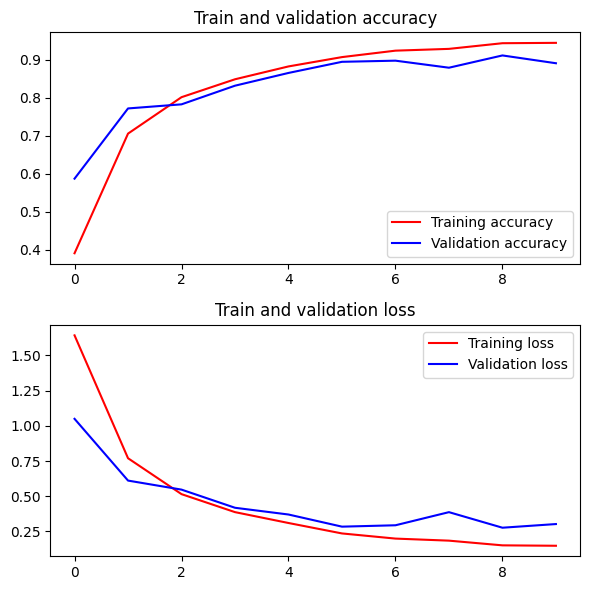

In [44]:
visualization(accuracy, val_accuracy, loss, val_loss)